In [1]:
import numpy as np
import pandas as pd
#시각화 패키지
import matplotlib.pyplot as plt
import platform
from matplotlib import font_manager, rc

if platform.system() == 'Darwin': rc('font', family='AppleGothic')

import matplotlib 
matplotlib.rcParams['axes.unicode_minus'] = False

In [2]:
housing = pd.read_csv('../data/housing.csv')

print(housing)

       longitude  latitude  housing_median_age  total_rooms  total_bedrooms  \
0        -122.23     37.88                41.0        880.0           129.0   
1        -122.22     37.86                21.0       7099.0          1106.0   
2        -122.24     37.85                52.0       1467.0           190.0   
3        -122.25     37.85                52.0       1274.0           235.0   
4        -122.25     37.85                52.0       1627.0           280.0   
...          ...       ...                 ...          ...             ...   
20635    -121.09     39.48                25.0       1665.0           374.0   
20636    -121.21     39.49                18.0        697.0           150.0   
20637    -121.22     39.43                17.0       2254.0           485.0   
20638    -121.32     39.43                18.0       1860.0           409.0   
20639    -121.24     39.37                16.0       2785.0           616.0   

       population  households  median_income  media

In [3]:
#ocean_proximity 특성의 분포 확인
print(housing['ocean_proximity'].value_counts())

<1H OCEAN     9136
INLAND        6551
NEAR OCEAN    2658
NEAR BAY      2290
ISLAND           5
Name: ocean_proximity, dtype: int64


In [4]:
#숫자 컬럼의 개략 정보 확인
print(housing.describe())

          longitude      latitude  housing_median_age   total_rooms  \
count  20640.000000  20640.000000        20640.000000  20640.000000   
mean    -119.569704     35.631861           28.639486   2635.763081   
std        2.003532      2.135952           12.585558   2181.615252   
min     -124.350000     32.540000            1.000000      2.000000   
25%     -121.800000     33.930000           18.000000   1447.750000   
50%     -118.490000     34.260000           29.000000   2127.000000   
75%     -118.010000     37.710000           37.000000   3148.000000   
max     -114.310000     41.950000           52.000000  39320.000000   

       total_bedrooms    population    households  median_income  \
count    20433.000000  20640.000000  20640.000000   20640.000000   
mean       537.870553   1425.476744    499.539680       3.870671   
std        421.385070   1132.462122    382.329753       1.899822   
min          1.000000      3.000000      1.000000       0.499900   
25%        296.00000

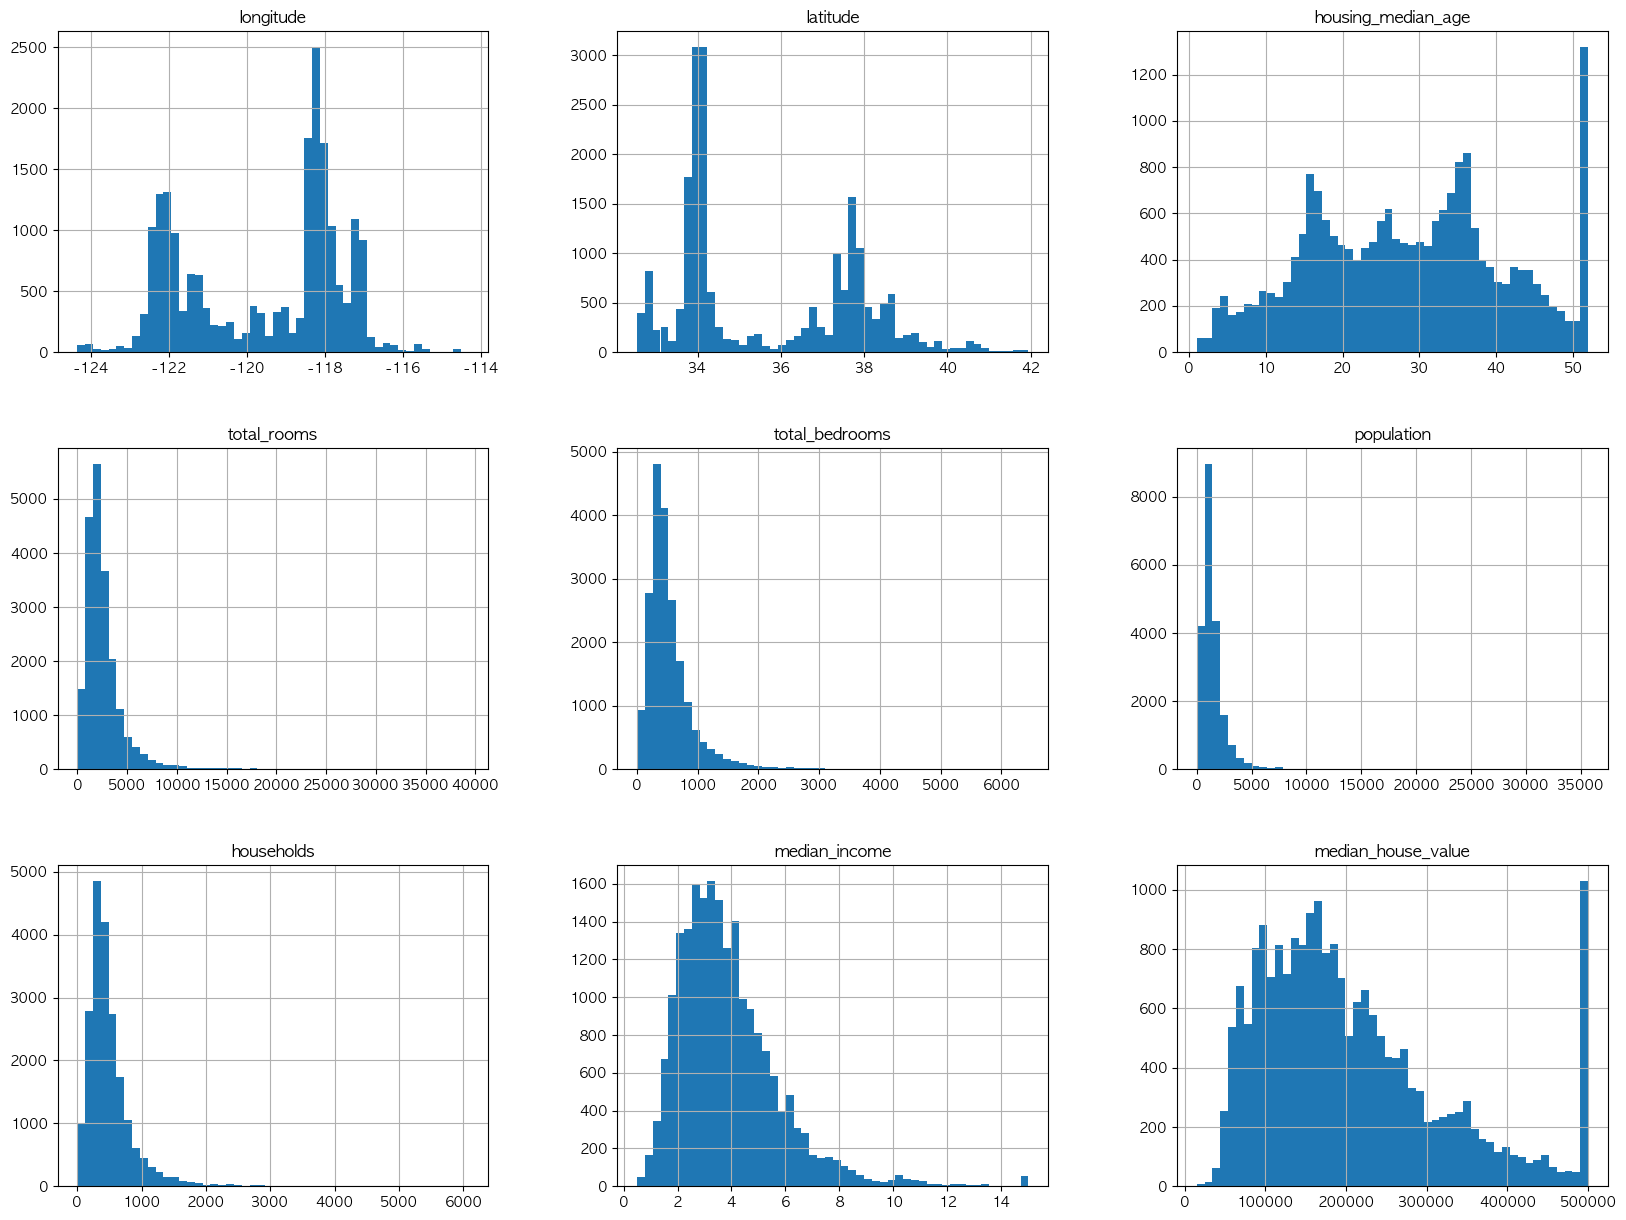

In [5]:
#모든 특성의 히스토그램 출력
%matplotlib inline
import matplotlib.pyplot as plt
housing.hist(bins=50, figsize=(20,15))
plt.savefig("attribute_histogram_plot", format="png", dpi=300)
plt.show()

In [6]:
import numpy as np

#난수 설정 - 항상 동일한 테스트 데이터를 사용하기 위한 목적
np.random.seed(42)

#데이터와 테스트 데이터의 비율을 매개변수로 받아서 테스트 데이터를 리턴해주는 함수
def split_train_test(data, test_ratio):
    shuffled_indices = np.random.permutation(len(data))
    test_set_size = int(len(data) * test_ratio)
    test_indices = shuffled_indices[:test_set_size]
    train_indices = shuffled_indices[test_set_size:]
    return data.iloc[train_indices], data.iloc[test_indices]

#8:2의 비율로 데이터를 분할하도록 함수를 호출
train_set, test_set = split_train_test(housing, 0.2)
print(len(train_set), "train +", len(test_set), "test")

16512 train + 4128 test


In [7]:
from zlib import crc32
# &연산은 파이썬 2 와의 호환성 때문
def test_set_check(identifier, test_ratio):
    return crc32(np.int64(identifier)) & 0xffffffff < test_ratio * 2**32

def split_train_test_by_id(data, test_ratio, id_column):
    ids = data[id_column]
    in_test_set = ids.apply(lambda id_: test_set_check(id_, test_ratio))
    return data.loc[~in_test_set], data.loc[in_test_set]

In [8]:
housing_with_id = housing.reset_index()   # `index` 열이 추가된 데이터프레임을 반환합니다
train_set, test_set = split_train_test_by_id(housing_with_id, 0.2, "index")

In [9]:
housing_with_id["id"] = housing["longitude"] * 1000 + housing["latitude"]
train_set, test_set = split_train_test_by_id(housing_with_id, 0.2, "id")

In [10]:
from sklearn.model_selection import train_test_split
train_set, test_set = train_test_split(housing, test_size=0.2, random_state=42)
test_set.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
20046,-119.01,36.06,25.0,1505.0,NaN,1392.0,359.0,1.6812,47700.0,INLAND
3024,-119.46,35.14,30.0,2943.0,NaN,1565.0,584.0,2.5313,45800.0,INLAND
15663,-122.44,37.80,52.0,3830.0,NaN,1310.0,963.0,3.4801,500001.0,NEAR BAY
20484,-118.72,34.28,17.0,3051.0,NaN,1705.0,495.0,5.7376,218600.0,<1H OCEAN
9814,-121.93,36.62,34.0,2351.0,NaN,1063.0,428.0,3.7250,278000.0,NEAR OCEAN


<Axes: >

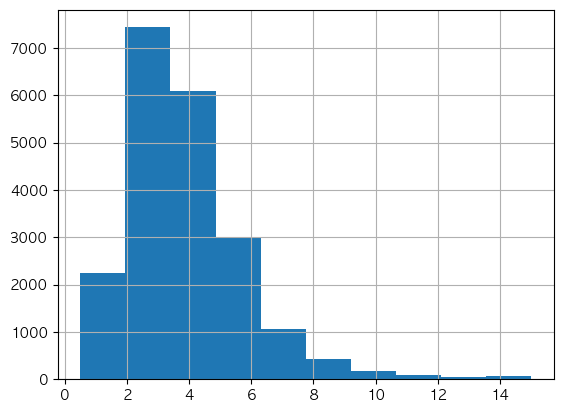

In [11]:
#중간 소득의 히스토그램
housing["median_income"].hist()

In [12]:
#pd.cutO 함수를 사용해 카테고리 5개를 가진 카테고리 특성을 생성
#1에서 5까지 테이블을 가짐
#카태고리 1은 0에서 1.5까지 범위(즉 $15，000 이하)이고 카태고리 2는 1.5에서 3까지 범위가 되는 식입
housing["income_cat"] = pd.cut(housing["median_income"],
                               bins=[0., 1.5, 3.0, 4.5, 6., np.inf],
                               labels=[1, 2, 3, 4, 5])
housing["income_cat"].value_counts()

3    7236
2    6581
4    3639
5    2362
1     822
Name: income_cat, dtype: int64

<Axes: >

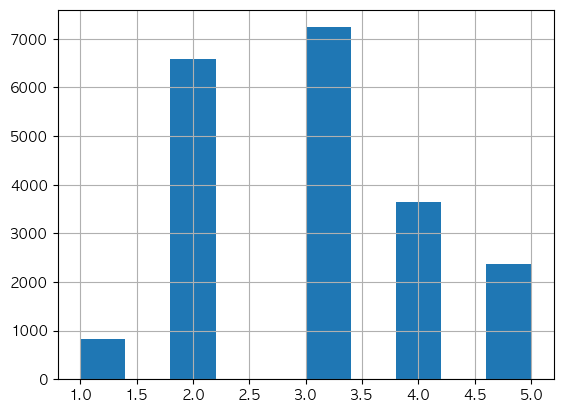

In [13]:
#히스토그램 확인
housing["income_cat"].hist()

In [14]:
from sklearn.model_selection import StratifiedShuffleSplit
#계층적 분할을 위한 객체 생성
split = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=42)
#income_cat 특성을 이용해서 계층적 분할
for train_index, test_index in split.split(housing, housing["income_cat"]):
    strat_train_set = housing.loc[train_index]
    strat_test_set = housing.loc[test_index]
#데이터 비율 확인
strat_test_set["income_cat"].value_counts() / len(strat_test_set)

3    0.350533
2    0.318798
4    0.176357
5    0.114341
1    0.039971
Name: income_cat, dtype: float64

In [15]:
# 랜덤하게 샘플링한 경우와 층화 추출을 이용한 방식의 샘플링 비율 확인
def income_cat_proportions(data):
    return data['income_cat'].value_counts() / len(data)


# 랜덤하게 샘플 추출
train_set, test_set = train_test_split(housing, test_size=0.2, random_state=42)

compare_props = pd.DataFrame({
    "Overall": income_cat_proportions(housing),
    "Stratified": income_cat_proportions(strat_test_set),
    "Random": income_cat_proportions(test_set),
    }).sort_index()

compare_props["Rand. %error"] = 100 * compare_props["Random"] / compare_props['Overall']
compare_props["Stratified. %error"] = 100 * compare_props["Stratified"] / compare_props['Overall']

print(compare_props)

#     Overall  Stratified    Random  Rand. %error  Stratified. %error
# 1  0.039826    0.039971  0.040213    100.973236          100.364964
# 2  0.318847    0.318798  0.324370    101.732260           99.984805
# 3  0.350581    0.350533  0.358527    102.266446           99.986180
# 4  0.176308    0.176357  0.167393     94.943666          100.027480
# 5  0.114438    0.114341  0.109496     95.681626           99.915326

    Overall  Stratified    Random  Rand. %error  Stratified. %error
1  0.039826    0.039971  0.040213    100.973236          100.364964
2  0.318847    0.318798  0.324370    101.732260           99.984805
3  0.350581    0.350533  0.358527    102.266446           99.986180
4  0.176308    0.176357  0.167393     94.943666          100.027480
5  0.114438    0.114341  0.109496     95.681626           99.915326


# 4. 데이터 탐색

In [16]:
corr_matrix = housing.corr() # 상관 계수 분석
corr_matrix['median_house_value'].sort_values(ascending=False)

# FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False.
# Select only valid columns or specify the value of numeric_only to silence this warning.
# corr_matrix = housing.corr()

/var/folders/8y/qly304_55c1cf35dff76v_lh0000gn/T/ipykernel_1992/551938169.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_matrix = housing.corr() # 상관 계수 분석


median_house_value    1.000000
median_income         0.688075
total_rooms           0.134153
housing_median_age    0.105623
households            0.065843
total_bedrooms        0.049686
population           -0.024650
longitude            -0.045967
latitude             -0.144160
Name: median_house_value, dtype: float64

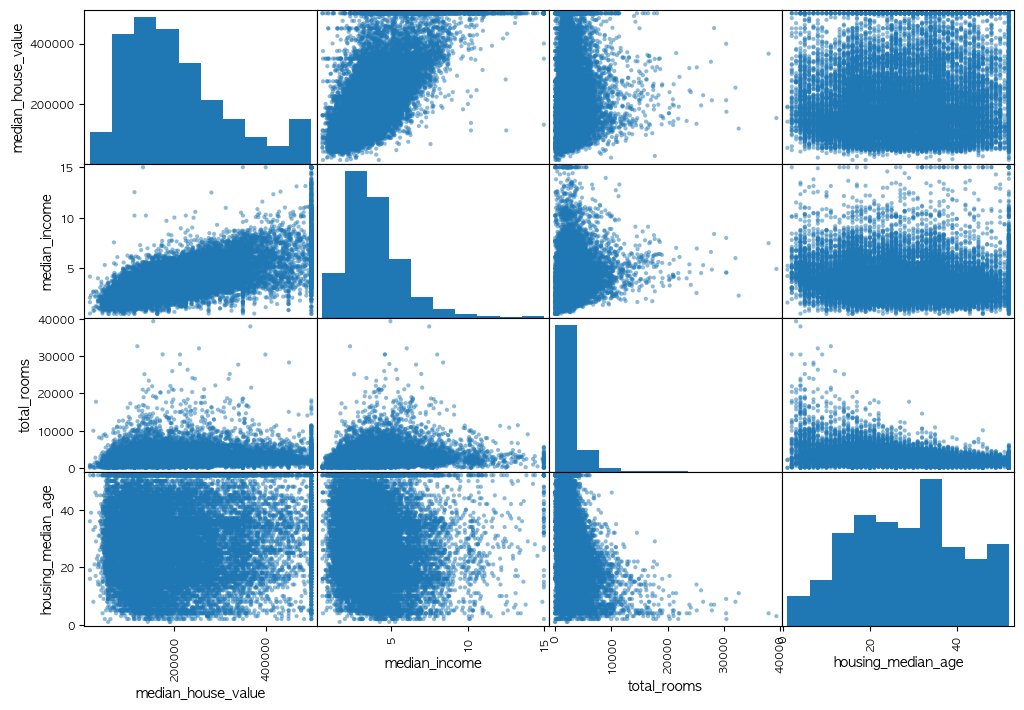

In [17]:
# 산점도를 이용한 상관 관계 파악
from pandas.plotting import scatter_matrix

attributes = ['median_house_value', 'median_income', 'total_rooms', 'housing_median_age']
scatter_matrix(housing[attributes], figsize=(12, 8))

# 파일로 저장
plt.savefig('scatter_matrix', format='jpg', dpi=300)
plt.show()

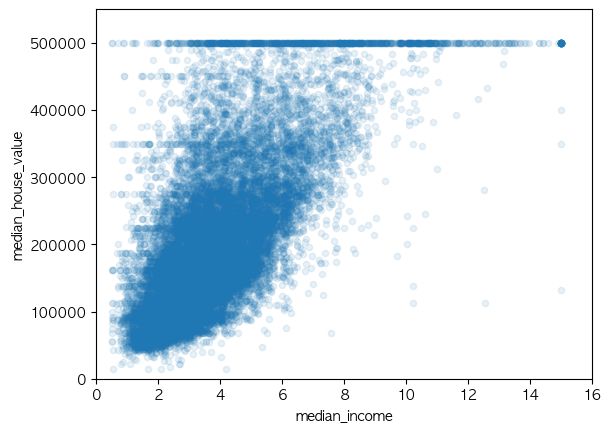

In [18]:
# 상관 관계가 높은 데이터만 분포 확인

housing.plot(kind='scatter', x='median_income', y='median_house_value', alpha=0.1)
plt.axis([0, 16, 0, 550000]) # 축 설정
plt.show()

# 특성 조합을 이용한 탐색

In [19]:
housing['rooms_per_household'] = housing['total_rooms'] / housing['households']
housing['bedrooms_per_room'] = housing['total_bedrooms'] / housing['total_rooms']
housing['population_per_household'] = housing['population'] / housing['households']

corr_matrix =  housing.corr()
print(corr_matrix['median_house_value'].sort_values(ascending=False))

# 하나의 특성 만으로 구한 상관 계수보다 특성을 조합할 새로 만들어진 특성이 상관 계수가 더 높을 수 있다.
#새로 만들어진 특성을 이용해서 머신러닝 모델을 만드는 것이 더 정확할 가능성이 높다.

# 상관 계수는 절댓값이 더 큰 값이 좋음

median_house_value          1.000000
median_income               0.688075
rooms_per_household         0.151948
total_rooms                 0.134153
housing_median_age          0.105623
households                  0.065843
total_bedrooms              0.049686
population_per_household   -0.023737
population                 -0.024650
longitude                  -0.045967
latitude                   -0.144160
bedrooms_per_room          -0.255880
Name: median_house_value, dtype: float64


/var/folders/8y/qly304_55c1cf35dff76v_lh0000gn/T/ipykernel_1992/1412339200.py:5: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_matrix =  housing.corr()


# 훈련할 데이터 (특징 배열) 과 타겟(레이블)을 분리

In [20]:
housing = strat_train_set.drop('median_house_value', axis=1)
housing_labels = strat_train_set['median_house_value'].copy()

In [21]:
sample_incomplete_rows = housing[housing.isnull().any(axis=1)]
print(sample_incomplete_rows)

       longitude  latitude  housing_median_age  total_rooms  total_bedrooms  \
1606     -122.08     37.88                26.0       2947.0             NaN   
10915    -117.87     33.73                45.0       2264.0             NaN   
19150    -122.70     38.35                14.0       2313.0             NaN   
4186     -118.23     34.13                48.0       1308.0             NaN   
16885    -122.40     37.58                26.0       3281.0             NaN   
...          ...       ...                 ...          ...             ...   
1350     -121.95     38.03                 5.0       5526.0             NaN   
4691     -118.37     34.07                50.0       2519.0             NaN   
9149     -118.50     34.46                17.0      10267.0             NaN   
16757    -122.48     37.70                33.0       4492.0             NaN   
13336    -117.67     34.04                13.0       1543.0             NaN   

       population  households  median_income ocean_

In [22]:
#누락된 구역 제거
housing.dropna(subset=["total_bedrooms"])

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity,income_cat
12655,-121.46,38.52,29.0,3873.0,797.0,2237.0,706.0,2.1736,INLAND,2
15502,-117.23,33.09,7.0,5320.0,855.0,2015.0,768.0,6.3373,NEAR OCEAN,5
2908,-119.04,35.37,44.0,1618.0,310.0,667.0,300.0,2.8750,INLAND,2
14053,-117.13,32.75,24.0,1877.0,519.0,898.0,483.0,2.2264,NEAR OCEAN,2
20496,-118.70,34.28,27.0,3536.0,646.0,1837.0,580.0,4.4964,<1H OCEAN,3
...,...,...,...,...,...,...,...,...,...,...
15174,-117.07,33.03,14.0,6665.0,1231.0,2026.0,1001.0,5.0900,<1H OCEAN,4
12661,-121.42,38.51,15.0,7901.0,1422.0,4769.0,1418.0,2.8139,INLAND,2
19263,-122.72,38.44,48.0,707.0,166.0,458.0,172.0,3.1797,<1H OCEAN,3
19140,-122.70,38.31,14.0,3155.0,580.0,1208.0,501.0,4.1964,<1H OCEAN,3


In [23]:
# 특성 제거 (열 자체를 제거함)
# 회귀분석이나 분류 분석에 영향력이 적은 피처는 이런 방법으로 종종 제거.
sample_incomplete_rows.drop("total_bedrooms", axis=1)

,longitude,latitude,housing_median_age,total_rooms,population,households,median_income,ocean_proximity,income_cat
1606,-122.08,37.88,26.0,2947.0,825.0,626.0,2.9330,NEAR BAY,2
10915,-117.87,33.73,45.0,2264.0,1970.0,499.0,3.4193,<1H OCEAN,3
19150,-122.70,38.35,14.0,2313.0,954.0,397.0,3.7813,<1H OCEAN,3
4186,-118.23,34.13,48.0,1308.0,835.0,294.0,4.2891,<1H OCEAN,3
16885,-122.40,37.58,26.0,3281.0,1145.0,480.0,6.3580,NEAR OCEAN,5
...,...,...,...,...,...,...,...,...,...
1350,-121.95,38.03,5.0,5526.0,3207.0,1012.0,4.0767,INLAND,3
4691,-118.37,34.07,50.0,2519.0,1117.0,516.0,4.3667,<1H OCEAN,3
9149,-118.50,34.46,17.0,10267.0,4956.0,1483.0,5.5061,<1H OCEAN,4
16757,-122.48,37.70,33.0,4492.0,3477.0,1537.0,3.0546,NEAR OCEAN,3


In [24]:
#중간값으로 대체
#계산한 중간값을 저장
#나중에 시스템을 평가할 때 태스트 세트에 있는 누락된 값과 시스템을 실제 운영될 때 새로운 데이터에 있는 누락된 값을 채워넣는데 필요
median = housing["total_bedrooms"].median()
housing["total_bedrooms"].fillna(median, inplace=True)
housing

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity,income_cat
12655,-121.46,38.52,29.0,3873.0,797.0,2237.0,706.0,2.1736,INLAND,2
15502,-117.23,33.09,7.0,5320.0,855.0,2015.0,768.0,6.3373,NEAR OCEAN,5
2908,-119.04,35.37,44.0,1618.0,310.0,667.0,300.0,2.8750,INLAND,2
14053,-117.13,32.75,24.0,1877.0,519.0,898.0,483.0,2.2264,NEAR OCEAN,2
20496,-118.70,34.28,27.0,3536.0,646.0,1837.0,580.0,4.4964,<1H OCEAN,3
...,...,...,...,...,...,...,...,...,...,...
15174,-117.07,33.03,14.0,6665.0,1231.0,2026.0,1001.0,5.0900,<1H OCEAN,4
12661,-121.42,38.51,15.0,7901.0,1422.0,4769.0,1418.0,2.8139,INLAND,2
19263,-122.72,38.44,48.0,707.0,166.0,458.0,172.0,3.1797,<1H OCEAN,3
19140,-122.70,38.31,14.0,3155.0,580.0,1208.0,501.0,4.1964,<1H OCEAN,3


In [25]:
# sklearn.impute 패키지의 SimpleImputer를 이용한 누락값 대체
from sklearn.impute import SimpleImputer

imputer = SimpleImputer(strategy='median')

# 숫자가 아닌 특성 제거
housing_num = housing.drop('ocean_proximity', axis= 1)

# 추정
imputer.fit(housing_num)

# 변환
X = imputer.transform(housing_num)

housing_tr = pd.DataFrame(X, columns=housing_num.columns, index=list(housing.index.values))
housing_tr.info()

# 누락된 데이터를 

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16512 entries, 12655 to 19773
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           16512 non-null  float64
 1   latitude            16512 non-null  float64
 2   housing_median_age  16512 non-null  float64
 3   total_rooms         16512 non-null  float64
 4   total_bedrooms      16512 non-null  float64
 5   population          16512 non-null  float64
 6   households          16512 non-null  float64
 7   median_income       16512 non-null  float64
 8   income_cat          16512 non-null  float64
dtypes: float64(9)
memory usage: 1.3 MB


# 범주형 데이터 처리

In [26]:
housing_cat = housing['ocean_proximity']
print(housing_cat.value_counts())

<1H OCEAN     7277
INLAND        5262
NEAR OCEAN    2124
NEAR BAY      1847
ISLAND           2
Name: ocean_proximity, dtype: int64


In [27]:
housing_cat_encode, housing_categories = housing_cat.factorize()
print(housing_cat_encode[:10], housing_categories, sep='\n')
print(housing_cat.head())

# [0 1 0 1 2 3 2 2 2 2]
# Index(['INLAND', 'NEAR OCEAN', '<1H OCEAN', 'NEAR BAY', 'ISLAND'], dtype='object')
# 12655        INLAND
# 15502    NEAR OCEAN
# 2908         INLAND
# 14053    NEAR OCEAN
# 20496     <1H OCEAN
# Name: ocean_proximity, dtype: object

[0 1 0 1 2 3 2 2 2 2]
Index(['INLAND', 'NEAR OCEAN', '<1H OCEAN', 'NEAR BAY', 'ISLAND'], dtype='object')
12655        INLAND
15502    NEAR OCEAN
2908         INLAND
14053    NEAR OCEAN
20496     <1H OCEAN
Name: ocean_proximity, dtype: object


In [28]:
from sklearn.preprocessing import OrdinalEncoder

housing_cat = housing[['ocean_proximity']]
ordinal_encoder = OrdinalEncoder()
housing_cat_encode = ordinal_encoder.fit_transform(housing_cat)
print(housing_cat_encode[:20])
print(housing_cat.head(20))

[[1.]
 [4.]
 [1.]
 [4.]
 [0.]
 [3.]
 [0.]
 [0.]
 [0.]
 [0.]
 [1.]
 [0.]
 [1.]
 [1.]
 [4.]
 [0.]
 [0.]
 [0.]
 [3.]
 [0.]]
      ocean_proximity
12655          INLAND
15502      NEAR OCEAN
2908           INLAND
14053      NEAR OCEAN
20496       <1H OCEAN
1481         NEAR BAY
18125       <1H OCEAN
5830        <1H OCEAN
17989       <1H OCEAN
4861        <1H OCEAN
20615          INLAND
11493       <1H OCEAN
12386          INLAND
2167           INLAND
14562      NEAR OCEAN
17821       <1H OCEAN
7667        <1H OCEAN
10779       <1H OCEAN
9390         NEAR BAY
11063       <1H OCEAN


In [29]:
from sklearn.preprocessing import OneHotEncoder

encoder = OneHotEncoder (categories= 'auto')
housing_cat_1hot = encoder.fit_transform(housing_cat_encode.reshape (-1, 1))
print (housing_cat_1hot[:5])

from sklearn.preprocessing import OneHotEncoder

encoder = OneHotEncoder (categories= 'auto', sparse_output=False)
housing_cat_1hot = encoder.fit_transform(housing_cat_encode.reshape (-1, 1))
print (housing_cat_1hot[:5])

  (0, 1)	1.0
  (1, 4)	1.0
  (2, 1)	1.0
  (3, 4)	1.0
  (4, 0)	1.0
[[0. 1. 0. 0. 0.]
 [0. 0. 0. 0. 1.]
 [0. 1. 0. 0. 0.]
 [0. 0. 0. 0. 1.]
 [1. 0. 0. 0. 0.]]


# 변환 파이프라인

In [30]:
# NaN을 median으로 대체하고 표준화를 수행.

from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

num_pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy='median')),
    ('std_scaler', StandardScaler())
])

housing_num_tr = num_pipeline.fit_transform(housing_num)
print(housing_tr)

       longitude  latitude  housing_median_age  total_rooms  total_bedrooms  \
12655    -121.46     38.52                29.0       3873.0           797.0   
15502    -117.23     33.09                 7.0       5320.0           855.0   
2908     -119.04     35.37                44.0       1618.0           310.0   
14053    -117.13     32.75                24.0       1877.0           519.0   
20496    -118.70     34.28                27.0       3536.0           646.0   
...          ...       ...                 ...          ...             ...   
15174    -117.07     33.03                14.0       6665.0          1231.0   
12661    -121.42     38.51                15.0       7901.0          1422.0   
19263    -122.72     38.44                48.0        707.0           166.0   
19140    -122.70     38.31                14.0       3155.0           580.0   
19773    -122.14     39.97                27.0       1079.0           222.0   

       population  households  median_income  incom

# Column Transformer

In [31]:
#최신 sklearn 패키지에는 특성 별로 별도의 변환기를 적용하는 ColumnTransformer가 추가
from sklearn.compose import ColumnTransformer

num_attribs = list(housing_num)
cat_attribs = ["ocean_proximity"]
#숫자에는 위에서 만든 파이프라인을 범주혀에는 원핫인코딩을 적용하기
full_pipeline = ColumnTransformer([
        ("num", num_pipeline, num_attribs),
        ("cat", OneHotEncoder(categories='auto'), cat_attribs),
    ])

housing_prepared = full_pipeline.fit_transform(housing)
print(housing_prepared)

[[-0.94135046  1.34743822  0.02756357 ...  0.          0.
   0.        ]
 [ 1.17178212 -1.19243966 -1.72201763 ...  0.          0.
   1.        ]
 [ 0.26758118 -0.1259716   1.22045984 ...  0.          0.
   0.        ]
 ...
 [-1.5707942   1.31001828  1.53856552 ...  0.          0.
   0.        ]
 [-1.56080303  1.2492109  -1.1653327  ...  0.          0.
   0.        ]
 [-1.28105026  2.02567448 -0.13148926 ...  0.          0.
   0.        ]]


# 훈련하고 평가하기

In [32]:
from sklearn.linear_model import LinearRegression

# 모델 인스턴스 생성
lin_reg = LinearRegression()

# 데이터를 이용해서 훈련
lin_reg.fit(housing_prepared, housing_labels)

# 확인
# 테스트할 데이터
some_data = housing.iloc[:5]

# 실제 값
some_labels = housing_labels.iloc[:5]

# 테스트 할 데이터를 모델에 대입하기 위해서 변환
some_data_prepared = full_pipeline.transform(some_data)

print('실제 값:', list(some_labels))
print('예측 값:', lin_reg.predict(some_data_prepared))

실제 값: [72100.0, 279600.0, 82700.0, 112500.0, 238300.0]
예측 값: [ 88320. 312128. 149632. 181632. 242048.]


In [33]:
# 평균 제곱근 오차 확인
from sklearn.metrics import mean_squared_error, mean_absolute_error

housing_predictions = lin_reg.predict(housing_prepared)

# 예측한 값과 관측된 값 사이의 제곱 오차를 구한다.
lin_mse = mean_squared_error(housing_labels, housing_predictions)

# 평균 제곱 오차에 제곱근을 구함. -> RMSE
lin_rmse = np.sqrt(lin_mse)
print(lin_rmse)

68870.57726746867


In [34]:
lin_rmae = mean_absolute_error(housing_labels, housing_predictions)

# RMAE
print(lin_rmae)

50014.814983042634


In [35]:
# dicision tree 를 이용해서 예측하고 평가
from sklearn.tree import DecisionTreeRegressor

tree_reg = DecisionTreeRegressor(random_state = 42)
tree_reg.fit(housing_prepared, housing_labels)
housing_predictions = tree_reg.predict(housing_prepared)
tree_mse = mean_squared_error(housing_labels, housing_predictions)
tree_rmse = np.sqrt(tree_mse)
print(tree_rmse)

0.0


# 교차 검증

In [36]:
def display_scores(scores):
    print("Scores: ", scores)
    print("Mean: ", scores.mean())
    print('Standard Deviation:', scores.std())

In [37]:
from sklearn.model_selection import cross_val_score

# 교차 검증에서는 평가 지표에 음수를 취해서 평가

scores = cross_val_score(tree_reg, housing_prepared, housing_labels, cv=10,
                         scoring='neg_mean_squared_error')

# 평균 제곱근 오차를 보고자하년 경우 다시 음수를 취해서 제곱근을 구해야 한다
tree_rmse_scores = np.sqrt(-scores)

display_scores(tree_rmse_scores)

Scores:  [70057.83449845 70997.63344057 65388.62218588 69907.24308437
 67871.99014821 68553.98959716 74440.91898076 69680.06037746
 66494.30933087 71362.55277542]
Mean:  69475.51544191419
Standard Deviation: 2451.756470120408


In [38]:
# 선형 회귀의 10겹 교차 검증
# 교차 검증에서는 평가 지표에 음수를 취해서 평가
scores = cross_val_score(lin_reg, housing_prepared, housing_labels, cv=10,
                         scoring='neg_mean_squared_error')

lin_rmse_scores = np.sqrt(-scores)
display_scores(lin_rmse_scores)

Scores:  [72113.32017251 65398.58537757 67488.15542314 69335.79856799
 66407.36798711 72763.65486499 70219.69171446 69377.52689085
 66848.70072187 70599.76646801]
Mean:  69055.25681884875
Standard Deviation: 2339.5556370111526


In [ ]:
# RandomForest 모델을 이용한 평가
from sklearn.ensemble import RandomForestRegressor

forest_reg = RandomForestRegressor(max_features=8, n_estimators=30)
forest_reg.fit(housing_prepared, housing_labels)
forest_scores = cross_val_score(forest_reg, housing_prepared, housing_labels,
                                cv=10, scoring='neg_mean_squared_error')
forest_rmse_scores = np.sqrt(-forest_scores)
print(display_scores(forest_rmse_scores))

# 그리드 탐색

In [ ]:
from sklearn.model_selection import GridSearchCV

# 3 * 4 + 1 * 2 * 3 = 18개
param_grid = [
    {'n_estimators': [3, 10, 30], 'max_features': [2, 4, 6 ,8]}, # 12개 모델이 만들어짐
    {'bootstrap':[False], 'n_estimators': [3, 10], 'max_features': [2, 3, 4]} # 6개의 모델이 만들어짐

]

forest_reg = RandomForestRegressor(random_state=42)
grid_search = GridSearchCV(forest_reg, param_grid, cv=5,
                           scoring='neg_mean_squared_error',
                           return_train_score=True, n_jobs=-1) # n_jobs는 스레드 개수

grid_search.fit(housing_prepared, housing_labels)


In [ ]:
print(grid_search.best_params_)

In [ ]:
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint

# 3 * 4 + 1 * 2 * 3 = 18개
param_grid = {
    'n estimators':randint(low=1, high=200),
    'max_features':randint(low=1, high=8)
}
forest_reg = RandomForestRegressor(random_state =42)
r_search = RandomizedSearchCV(forest_reg, param_distributions=param_grid, cv=5,
                              scoring='neg_mean_squared_error', n_iter=10, return_train_score=True, n_jobs =-1)

r_search.fit(housing_prepared, housing_labels)